<a href="https://colab.research.google.com/github/muoyo/chicago-ridesharing/blob/anesu/Chicago_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install sodapy

In [0]:
#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
# pip install sodapy

import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
#client = Socrata("data.cityofchicago.org", None, timeout=100)

#Example authenticated client (needed for non-public datasets):
client = Socrata("data.cityofchicago.org",
                 "N0amD6E3UkUmVTl5nFWXbIyl4",
                 username="anesumasube@gmail.com",
                 password="Marywandi11!", timeout=1000)

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("m6dm-c72p",limit=1000000, select='trip_id, trip_start_timestamp, trip_end_timestamp, trip_seconds, trip_miles, pickup_community_area, dropoff_community_area, fare, tip, additional_charges, trip_total ')
# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [4]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 11 columns):
trip_id                   1000000 non-null object
trip_start_timestamp      1000000 non-null object
trip_end_timestamp        1000000 non-null object
trip_seconds              999963 non-null object
trip_miles                1000000 non-null object
pickup_community_area     942789 non-null object
dropoff_community_area    935729 non-null object
fare                      999998 non-null object
tip                       999998 non-null object
additional_charges        999999 non-null object
trip_total                999998 non-null object
dtypes: object(11)
memory usage: 83.9+ MB


In [5]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 11 columns):
trip_id                   1000000 non-null object
trip_start_timestamp      1000000 non-null object
trip_end_timestamp        1000000 non-null object
trip_seconds              999963 non-null object
trip_miles                1000000 non-null object
pickup_community_area     942789 non-null object
dropoff_community_area    935729 non-null object
fare                      999998 non-null object
tip                       999998 non-null object
additional_charges        999999 non-null object
trip_total                999998 non-null object
dtypes: object(11)
memory usage: 83.9+ MB


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime 

In [0]:
results_df['trip_start_timestamp']= pd.to_datetime(results_df['trip_start_timestamp'])
results_df['trip_end_timestamp']= pd.to_datetime(results_df['trip_end_timestamp'])


for col in ['trip_miles','fare','tip','trip_total']:
    results_df[col]= results_df[col].astype(float)

In [8]:

results_df.head()

,trip_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tip,additional_charges,trip_total
0,d55cb71337c1db729641190f644637f47745d5b3,2019-02-05 21:15:00,2019-02-05 21:30:00,808,4.625240,4,6,10.0,0.0,2.55,12.55
1,d55cb73c44b5b19db48284516e9479be26931cc8,2019-01-12 00:00:00,2019-01-12 00:15:00,590,2.215248,8,32,7.5,2.0,2.55,12.05
2,d55cb7cf4e1b7d03db25f16b0951cb59813897ca,2019-02-08 21:45:00,2019-02-08 22:00:00,349,1.410022,24,24,5.0,0.0,2.55,7.55
3,d55cb7f57c9f777d6d4e139baec1ed3d6a470729,2019-03-04 00:00:00,2019-03-04 00:15:00,1439,17.728125,76,8,25.0,0.0,0,25.00
4,d55cb80290d33d06533c9b68615c2cfcc98d9966,2019-02-04 08:45:00,2019-02-04 08:45:00,268,1.132505,70,71,5.0,0.0,2.55,7.55


In [0]:
results_df['pickup_community_area'] = results_df['pickup_community_area'].fillna(0)

In [0]:
results_df['dropoff_community_area'] = results_df['dropoff_community_area'].fillna(0)

In [0]:

for col in ['pickup_community_area','dropoff_community_area','trip_seconds']:
    results_df[col]= results_df[col].astype(float)



In [12]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 11 columns):
trip_id                   1000000 non-null object
trip_start_timestamp      1000000 non-null datetime64[ns]
trip_end_timestamp        1000000 non-null datetime64[ns]
trip_seconds              999963 non-null float64
trip_miles                1000000 non-null float64
pickup_community_area     1000000 non-null float64
dropoff_community_area    1000000 non-null float64
fare                      999998 non-null float64
tip                       999998 non-null float64
additional_charges        999999 non-null object
trip_total                999998 non-null float64
dtypes: datetime64[ns](2), float64(7), object(2)
memory usage: 83.9+ MB


In [0]:
import seaborn as sns

In [14]:
results_df = results_df.drop(columns='trip_id')
results_df.head()

,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tip,additional_charges,trip_total
0,2019-02-05 21:15:00,2019-02-05 21:30:00,808.0,4.625240,4.0,6.0,10.0,0.0,2.55,12.55
1,2019-01-12 00:00:00,2019-01-12 00:15:00,590.0,2.215248,8.0,32.0,7.5,2.0,2.55,12.05
2,2019-02-08 21:45:00,2019-02-08 22:00:00,349.0,1.410022,24.0,24.0,5.0,0.0,2.55,7.55
3,2019-03-04 00:00:00,2019-03-04 00:15:00,1439.0,17.728125,76.0,8.0,25.0,0.0,0,25.00
4,2019-02-04 08:45:00,2019-02-04 08:45:00,268.0,1.132505,70.0,71.0,5.0,0.0,2.55,7.55


In [15]:
results_df.head()

,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tip,additional_charges,trip_total
0,2019-02-05 21:15:00,2019-02-05 21:30:00,808.0,4.625240,4.0,6.0,10.0,0.0,2.55,12.55
1,2019-01-12 00:00:00,2019-01-12 00:15:00,590.0,2.215248,8.0,32.0,7.5,2.0,2.55,12.05
2,2019-02-08 21:45:00,2019-02-08 22:00:00,349.0,1.410022,24.0,24.0,5.0,0.0,2.55,7.55
3,2019-03-04 00:00:00,2019-03-04 00:15:00,1439.0,17.728125,76.0,8.0,25.0,0.0,0,25.00
4,2019-02-04 08:45:00,2019-02-04 08:45:00,268.0,1.132505,70.0,71.0,5.0,0.0,2.55,7.55


In [0]:
results_df=results_df.drop(columns='additional_charges')

In [17]:
results_df= results_df.drop(columns='tip')
results_df.head()

,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,trip_total
0,2019-02-05 21:15:00,2019-02-05 21:30:00,808.0,4.625240,4.0,6.0,10.0,12.55
1,2019-01-12 00:00:00,2019-01-12 00:15:00,590.0,2.215248,8.0,32.0,7.5,12.05
2,2019-02-08 21:45:00,2019-02-08 22:00:00,349.0,1.410022,24.0,24.0,5.0,7.55
3,2019-03-04 00:00:00,2019-03-04 00:15:00,1439.0,17.728125,76.0,8.0,25.0,25.00
4,2019-02-04 08:45:00,2019-02-04 08:45:00,268.0,1.132505,70.0,71.0,5.0,7.55


In [18]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
results_df.to_csv('rideshare2.csv', index=False)

In [20]:
ride_data = pd.read_csv('rideshare2.csv')
ride_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
trip_start_timestamp      1000000 non-null object
trip_end_timestamp        1000000 non-null object
trip_seconds              999963 non-null float64
trip_miles                1000000 non-null float64
pickup_community_area     1000000 non-null float64
dropoff_community_area    1000000 non-null float64
fare                      999998 non-null float64
trip_total                999998 non-null float64
dtypes: float64(6), object(2)
memory usage: 61.0+ MB


In [0]:
ride_data['trip_start_timestamp']= pd.to_datetime(ride_data['trip_start_timestamp'])
ride_data['trip_end_timestamp']= pd.to_datetime(ride_data['trip_end_timestamp'])

In [0]:
ride_variables= ride_data[['trip_miles','trip_seconds','pickup_community_area','dropoff_community_area']]

In [23]:
ride_variables.head()

,trip_miles,trip_seconds,pickup_community_area,dropoff_community_area
0,4.625240,808.0,4.0,6.0
1,2.215248,590.0,8.0,32.0
2,1.410022,349.0,24.0,24.0
3,17.728125,1439.0,76.0,8.0
4,1.132505,268.0,70.0,71.0


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


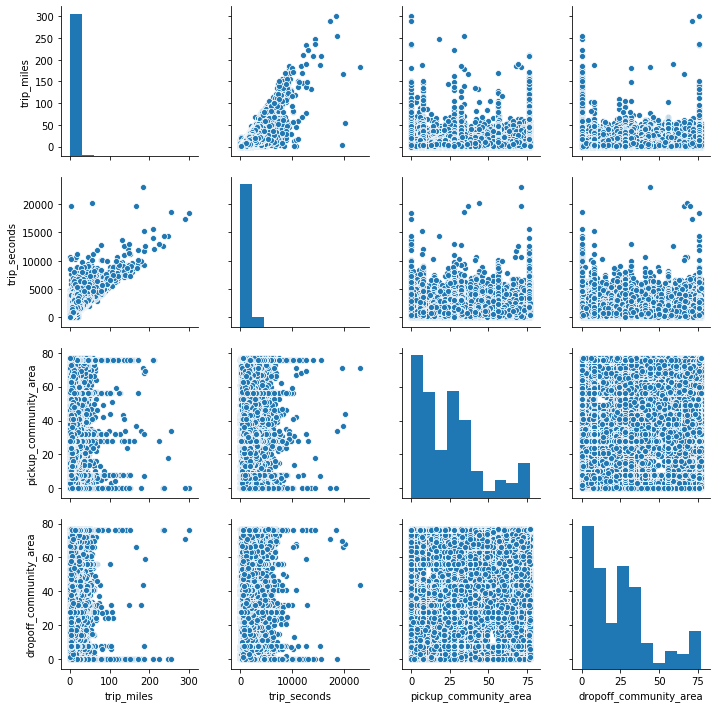

In [24]:
sns.pairplot(ride_variables)

In [25]:
ride_variables.corr()

,trip_miles,trip_seconds,pickup_community_area,dropoff_community_area
trip_miles,1.000000,0.809803,0.142776,0.136380
trip_seconds,0.809803,1.000000,0.093550,0.104288
pickup_community_area,0.142776,0.093550,1.000000,0.147683
dropoff_community_area,0.136380,0.104288,0.147683,1.000000


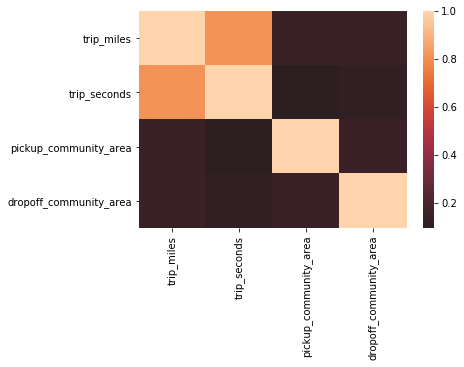

In [27]:

sns.heatmap(ride_variables.corr(), center=0)

In [28]:
ride_share = ride_data.iloc[:200000, :7]
ride_share.head()


,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare
0,2019-02-05 21:15:00,2019-02-05 21:30:00,808.0,4.625240,4.0,6.0,10.0
1,2019-01-12 00:00:00,2019-01-12 00:15:00,590.0,2.215248,8.0,32.0,7.5
2,2019-02-08 21:45:00,2019-02-08 22:00:00,349.0,1.410022,24.0,24.0,5.0
3,2019-03-04 00:00:00,2019-03-04 00:15:00,1439.0,17.728125,76.0,8.0,25.0
4,2019-02-04 08:45:00,2019-02-04 08:45:00,268.0,1.132505,70.0,71.0,5.0


In [29]:
ride_share['start_date'] = [d.date() for d in ride_share['trip_start_timestamp']]
ride_share.head()

,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,start_date
0,2019-02-05 21:15:00,2019-02-05 21:30:00,808.0,4.625240,4.0,6.0,10.0,2019-02-05
1,2019-01-12 00:00:00,2019-01-12 00:15:00,590.0,2.215248,8.0,32.0,7.5,2019-01-12
2,2019-02-08 21:45:00,2019-02-08 22:00:00,349.0,1.410022,24.0,24.0,5.0,2019-02-08
3,2019-03-04 00:00:00,2019-03-04 00:15:00,1439.0,17.728125,76.0,8.0,25.0,2019-03-04
4,2019-02-04 08:45:00,2019-02-04 08:45:00,268.0,1.132505,70.0,71.0,5.0,2019-02-04


In [30]:
ride_share['start_date'].max()

datetime.date(2019, 3, 31)

In [0]:
# from google.colab import drive
# drive.mount('drive')

In [0]:
# results_df.to_csv('ridedata.csv')
# !cp ridedata.csv "drive/My Drive/"

In [0]:
# from google.colab import drive
# drive.mount('/content/drive')

In [0]:
# results_df.to_csv('ridedata.csv')
# !cp ridedata.csv "content/drive/My Drive/"

In [31]:
ride_share['start_day'] = [d.weekday() for d in ride_share['trip_start_timestamp']]

ride_share.head()

,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,start_date,start_day
0,2019-02-05 21:15:00,2019-02-05 21:30:00,808.0,4.625240,4.0,6.0,10.0,2019-02-05,1
1,2019-01-12 00:00:00,2019-01-12 00:15:00,590.0,2.215248,8.0,32.0,7.5,2019-01-12,5
2,2019-02-08 21:45:00,2019-02-08 22:00:00,349.0,1.410022,24.0,24.0,5.0,2019-02-08,4
3,2019-03-04 00:00:00,2019-03-04 00:15:00,1439.0,17.728125,76.0,8.0,25.0,2019-03-04,0
4,2019-02-04 08:45:00,2019-02-04 08:45:00,268.0,1.132505,70.0,71.0,5.0,2019-02-04,0


In [33]:
ride_share['start_time'] = [d.hour for d in ride_share['trip_start_timestamp']]
ride_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 10 columns):
trip_start_timestamp      200000 non-null datetime64[ns]
trip_end_timestamp        200000 non-null datetime64[ns]
trip_seconds              199994 non-null float64
trip_miles                200000 non-null float64
pickup_community_area     200000 non-null float64
dropoff_community_area    200000 non-null float64
fare                      200000 non-null float64
start_date                200000 non-null object
start_day                 200000 non-null int64
start_time                200000 non-null int64
dtypes: datetime64[ns](2), float64(5), int64(2), object(1)
memory usage: 15.3+ MB


In [0]:
ride_share['time_block'] = ride_share['start_time']//3

In [35]:
ride_share.head()

,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,start_date,start_day,start_time,time_block
0,2019-02-05 21:15:00,2019-02-05 21:30:00,808.0,4.625240,4.0,6.0,10.0,2019-02-05,1,21,7
1,2019-01-12 00:00:00,2019-01-12 00:15:00,590.0,2.215248,8.0,32.0,7.5,2019-01-12,5,0,0
2,2019-02-08 21:45:00,2019-02-08 22:00:00,349.0,1.410022,24.0,24.0,5.0,2019-02-08,4,21,7
3,2019-03-04 00:00:00,2019-03-04 00:15:00,1439.0,17.728125,76.0,8.0,25.0,2019-03-04,0,0,0
4,2019-02-04 08:45:00,2019-02-04 08:45:00,268.0,1.132505,70.0,71.0,5.0,2019-02-04,0,8,2


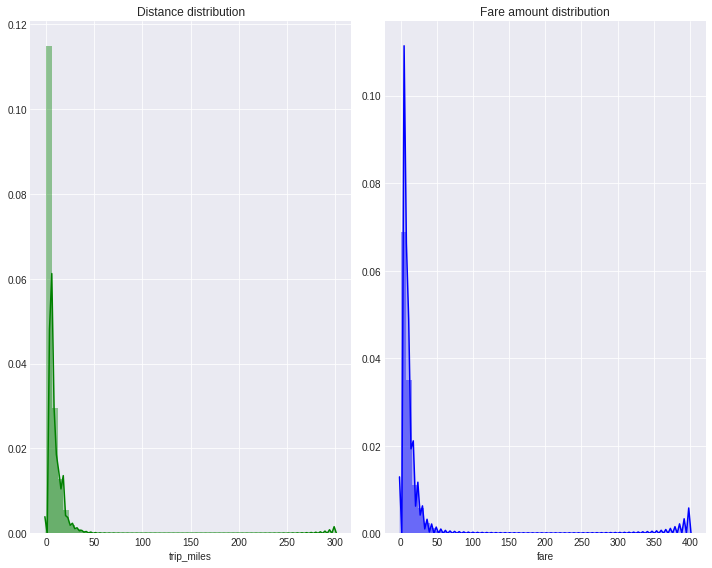

In [47]:
# set seaborn style with dark grid
plt.style.use('seaborn-darkgrid')

"""
- combine the distplots in one figure, customize the size

"""
f = plt.subplots(2,2,figsize=(10,8))
plt.subplot(1, 2, 1)
sns.distplot(ride_share['trip_miles'], kde=True, color="g", kde_kws={"shade": True}, label = 'trip-miles')
plt.title('Distance distribution')

plt.subplot(1, 2, 2)
sns.distplot(ride_share['fare'], kde=True, color="b", kde_kws={"shade": True}, label = 'fare-amount')
plt.title('Fare amount distribution')

plt.tight_layout()

Text(0, 0.5, 'fare-amount')

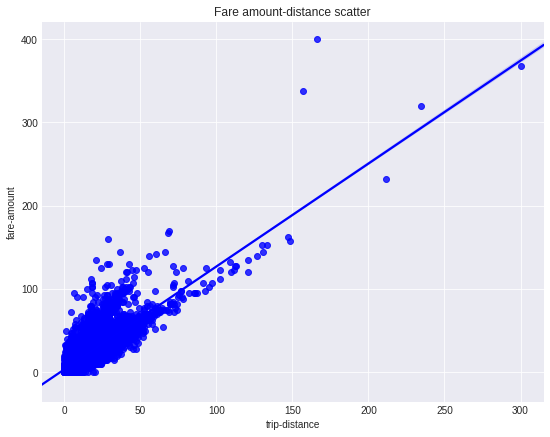

In [54]:
"""
- shuffle datframe, take the portion of 10000 rows
- use .corr() method to compute Pearson r for two variables in entire dataframe

"""

#sample = shuffle(ride_share)[0:10000]
# Create the plot object
fig, ax = plt.subplots(figsize=(9,7))

# Plot the data, set the size (s), color and transparency (alpha)
# of the points
sns.regplot(ride_share['trip_miles'], ride_share['fare'], color = 'b')


# Label the axes and provide a title
ax.set_title('Fare amount-distance scatter')
ax.set_xlabel('trip-miles')
ax.set_ylabel('fare-amount')
#print 'Pearson correlation: + str(round(ride_share['fare'].corr(ride_share['trip_miles']),2))

Text(0.5, 1.0, 'Mean fare amount per weekday day')

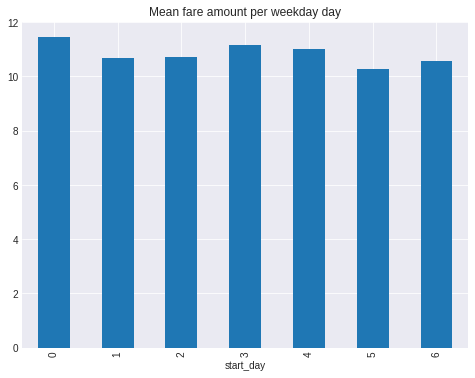

In [57]:
"""
- groupby data by pickup day and estimate the mean 

"""
fig, ax = plt.subplots(figsize=(8,6))
ride_share.groupby('start_day')['fare'].mean().plot.bar()
ax.set_title('Mean fare amount per weekday day')


Text(0.5, 1.0, 'Mean fare amount per day')

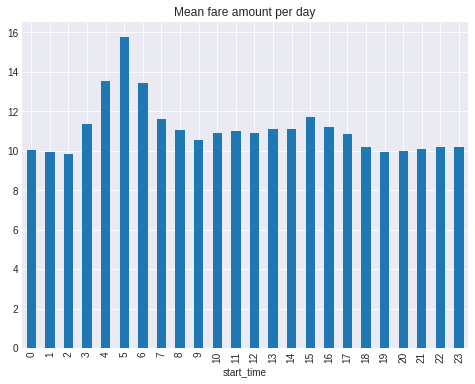

In [58]:
"""
- groupby data by pickup time and estimate the mean 

"""
fig, ax = plt.subplots(figsize=(8,6))
ride_share.groupby('start_time')['fare'].mean().plot.bar()
ax.set_title('Mean fare amount per day')

Text(0.5, 1.0, 'Mean fare amount time block')

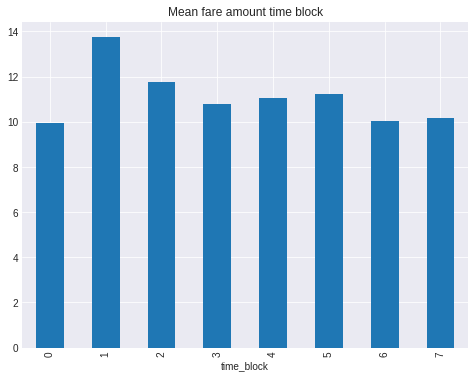

In [59]:
"""
- groupby data by pickup time block and estimate the mean 

"""
fig, ax = plt.subplots(figsize=(8,6))
ride_share.groupby('time_block')['fare'].mean().plot.bar()
ax.set_title('Mean fare amount time block')

Text(0.5, 1.0, 'Mean fare amount pickup area')

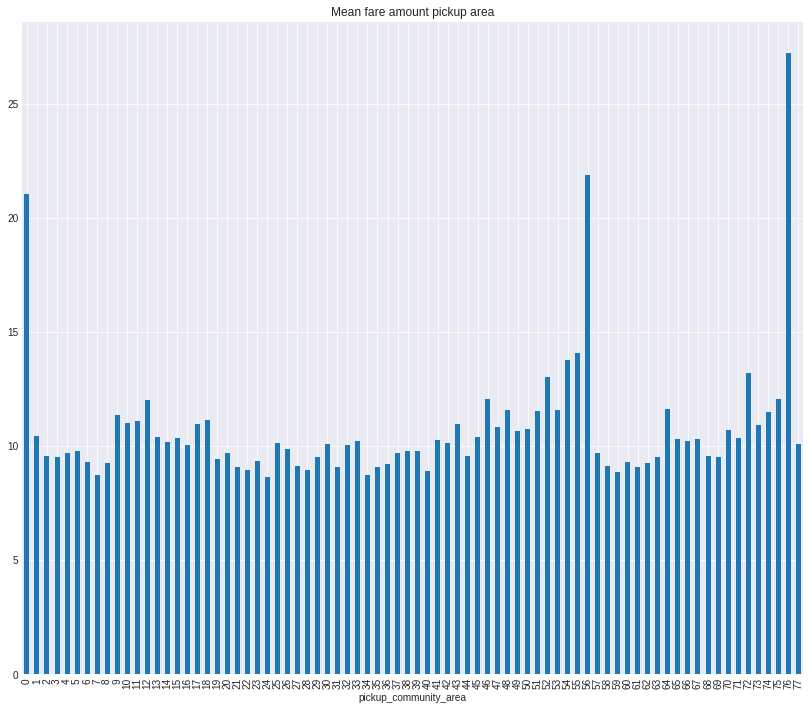

In [61]:
"""
- groupby data by pickup time area and estimate the mean 

"""
fig, ax = plt.subplots(figsize=(14,12))
ride_share.groupby('pickup_community_area')['fare'].mean().plot.bar()
ax.set_title('Mean fare amount pickup area')

In [36]:
ride_share['start_day'].value_counts()

4    34879
5    34176
3    28978
6    26602
1    25913
2    25721
0    23731
Name: start_day, dtype: int64

In [0]:
ride_share['pickup_community_area'] = ride_share['pickup_community_area'].astype('int64')

In [38]:
ride_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 11 columns):
trip_start_timestamp      200000 non-null datetime64[ns]
trip_end_timestamp        200000 non-null datetime64[ns]
trip_seconds              199994 non-null float64
trip_miles                200000 non-null float64
pickup_community_area     200000 non-null int64
dropoff_community_area    200000 non-null float64
fare                      200000 non-null float64
start_date                200000 non-null object
start_day                 200000 non-null int64
start_time                200000 non-null int64
time_block                200000 non-null int64
dtypes: datetime64[ns](2), float64(4), int64(4), object(1)
memory usage: 16.8+ MB


**One Hot Encode the categorical variables**

In [39]:
# assign the categorical variables to encode
X = ride_share[[ 'start_day', 'time_block', 'pickup_community_area']]
X.shape

(200000, 3)

In [0]:
# One hot encoding 
from sklearn import preprocessing

In [0]:

# Create One Hot Encoder Object

# 1 Instantiate thh variables

enc = preprocessing.OneHotEncoder()

# 2 Fit

enc.fit(X)

# 3 Transform

onehotlabels = enc.transform(X)

columns = enc.get_feature_names(input_features=X.columns)


X_df = pd.DataFrame(onehotlabels.todense(), columns=columns)


In [0]:


# X_df['trip_seconds'] = ride_df['trip_seconds']
# X_df.head()


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
y = ride_share['fare']

In [0]:
X_train , X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.25, random_state=12)

In [0]:
import statsmodels.api as sm

In [46]:
X_df = sm.add_constant(X_df)
est = sm.OLS(y, X_df).fit()
#predictions = est.predict(X_df)
est.summary()


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   fare   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     626.8
Date:                Wed, 22 Jan 2020   Prob (F-statistic):               0.00
Time:                        14:04:16   Log-Likelihood:            -7.0101e+05
No. Observations:              200000   AIC:                         1.402e+06
Df Residuals:                  199909   BIC:                         1.403e+06
Df Model:                          90                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        8.5166      0.034    253.286      0.000       8.451       8.583
start_day_0                  1.4180      0.048     29.371      0.000       1.323       1.513
start_day_1                  0.9238      0.046     19.901      0.000       0.833       1.015
start_day_2                  0.9558      0.047     20.479      0.000       0.864       1.047
start_day_3                  1.4343      0.044     32.343      0.000       1.347       1.521
start_day_4                  1.5283      0.041     37.283      0.000       1.448       1.609
start_day_5                  1.2435      0.042     29.855      0.000       1.162       1.325
start_day_6                  1.0129      0.047     21.778      0.000       0.922       1.104
time_block_0                 0.2736      0.063      4.323      0.000       0.150       0.398
time_block_1                 3.4175      0.084     40.650      0.000       3.253       3.582
time_block_2                 1.9096      0.051     37.656      0.000       1.810       2.009
time_block_3                 0.7503      0.048     15.712      0.000       0.657       0.844
time_block_4                 0.8154      0.047     17.213      0.000       0.723       0.908
time_block_5                 1.0981      0.043     25.529      0.000       1.014       1.182
time_block_6                 0.1030      0.041      2.507      0.012       0.022       0.184
time_block_7                 0.1491      0.046      3.265      0.001       0.060       0.239
pickup_community_area_0     10.3010      0.085    120.833      0.000      10.134      10.468
pickup_community_area_1     -0.2335      0.166     -1.406      0.160      -0.559       0.092
pickup_community_area_2     -1.1025      0.195     -5.662      0.000      -1.484      -0.721
pickup_community_area_3     -1.0262      0.128     -8.040      0.000      -1.276      -0.776
pickup_community_area_4     -0.8367      0.175     -4.790      0.000      -1.179      -0.494
pickup_community_area_5     -0.7269      0.164     -4.438      0.000      -1.048      -0.406
pickup_community_area_6     -1.2190      0.081    -15.094      0.000      -1.377      -1.061
pickup_community_area_7     -1.7474      0.087    -20.128      0.000      -1.918      -1.577
pickup_community_area_8     -1.2481      0.061    -20.317      0.000      -1.369      -1.128
pickup_community_area_9      0.7221      0.606      1.191      0.234      -0.466       1.910
pickup_community_area_10     0.2910      0.336      0.867      0.386      -0.367       0.949
pickup_community_area_11     0.4195      0.348      1.204      0.228      -0.263       1.102
pickup_community_area_12     1.4390      0.518      2.777      0.005       0.423       2.455
pickup_community_area_13    -0.2196      0.364     -0.603      0.546      -0.933       0.494
pickup_communi